In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report

In [ ]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

In [ ]:
def print_report(y_true, ypred, model_name):
  print('-'*30)
  print(f"Model Name: {model_name}")
  print('-'*30)
  print("Confusion Matrix: ")
  print(confusion_matrix(y_true, ypred))

  print('-'*30)
  print(f"Accuracy_score: {accuracy_score(y_true, ypred)}")
  print("-"*30)
  print(f"Recall_score: {recall_score(y_true, ypred, average='macro')}")
  print('-'* 30)
  print(f"Precision_score: {precision_score(y_true, ypred, average='macro')}")
  print('-'* 30)
  print(f"F1_score: {f1_score(y_true, ypred, average='macro')}")
  print('-'*30)
  print("Classification Report: ")
  print(classification_report(y_true, ypred))
  print('-'*30)

In [ ]:
def print_tree(model, df, criterion):
  fig= plt.figure(figsize= (15, 10))
  _= plot_tree(decision_tree= model, feature_names= df.columns, class_names= ["Male", "Female"], filled=True)
  fig.savefig(f"breast_cancer_decision_tree_with_{criterion}.png")

In [ ]:
df= pd.concat([X, y], axis= 1)
pd.set_option('display.max_columns', None)
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
print(df.shape)

(569, 31)


In [ ]:
df["Diagnosis"].value_counts()

,count
Diagnosis,
B,357
M,212


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum().sum()

np.int64(0)

In [ ]:
le= LabelEncoder()

In [ ]:
df["Diagnosis"]= le.fit_transform(df["Diagnosis"])

In [ ]:
y= df["Diagnosis"].values
x= df.drop(["Diagnosis"], axis=1)

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

In [ ]:
classifier_entropy= DecisionTreeClassifier(criterion= "entropy", max_depth= 4)

In [ ]:
classifier_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
ypred_entropy= classifier_entropy.predict(x_test)

In [ ]:
print_report(le.inverse_transform(y_test), le.inverse_transform(ypred_entropy), "Decision Tree Classifier with Entropy")

------------------------------
Model Name: Decision Tree Classifier with Entropy
------------------------------
Confusion Matrix: 
[[70  1]
 [ 5 38]]
------------------------------
Accuracy_score: 0.9473684210526315
------------------------------
Recall_score: 0.9348182115951523
------------------------------
Precision_score: 0.9538461538461538
------------------------------
F1_score: 0.942866688940862
------------------------------
Classification Report: 
              precision    recall  f1-score   support

           B       0.93      0.99      0.96        71
           M       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

------------------------------


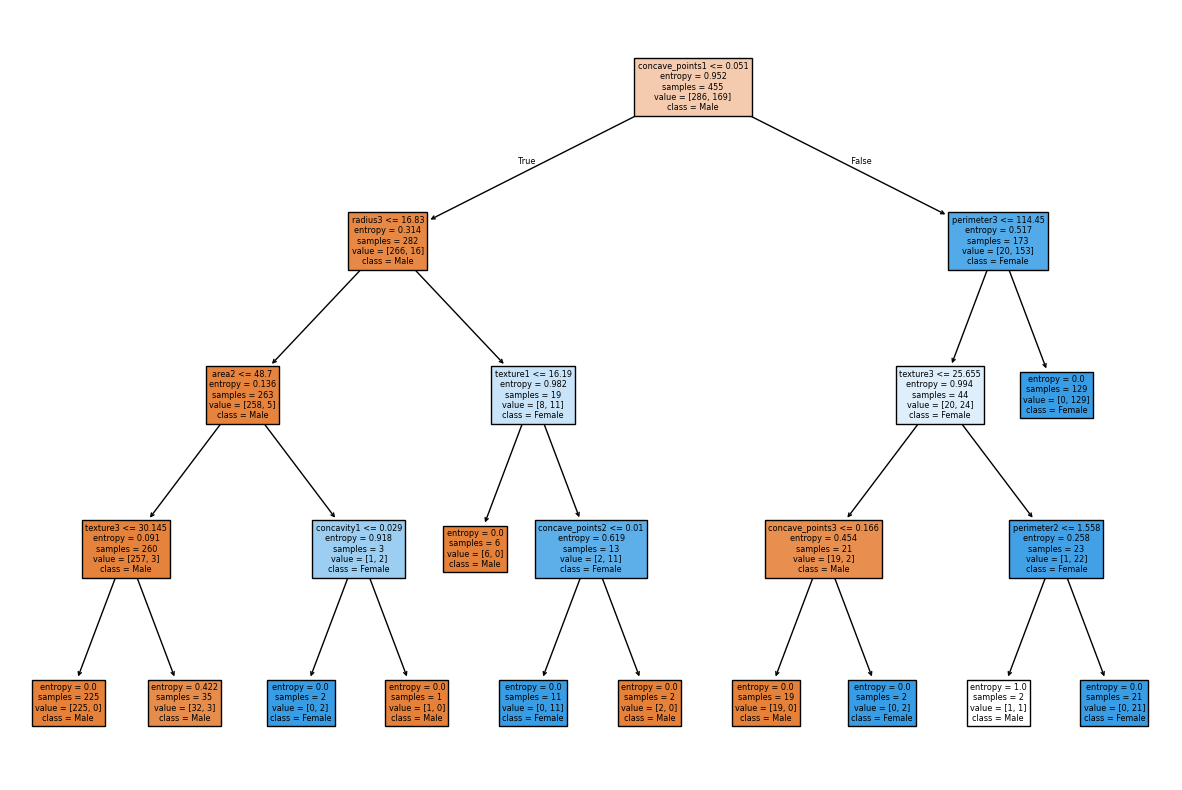

In [ ]:
print_tree(classifier_entropy, x, "entropy")

In [ ]:
classifier_gini= DecisionTreeClassifier(criterion= "gini")
classifier_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
ypred_gini= classifier_gini.predict(x_test)

In [ ]:
print_report(le.inverse_transform(y_test), le.inverse_transform(ypred_gini), "Decision Tree Classifier with Gini")

------------------------------
Model Name: Decision Tree Classifier with Gini
------------------------------
Confusion Matrix: 
[[67  4]
 [ 4 39]]
------------------------------
Accuracy_score: 0.9298245614035088
------------------------------
Recall_score: 0.9253193580085162
------------------------------
Precision_score: 0.9253193580085162
------------------------------
F1_score: 0.9253193580085162
------------------------------
Classification Report: 
              precision    recall  f1-score   support

           B       0.94      0.94      0.94        71
           M       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

------------------------------


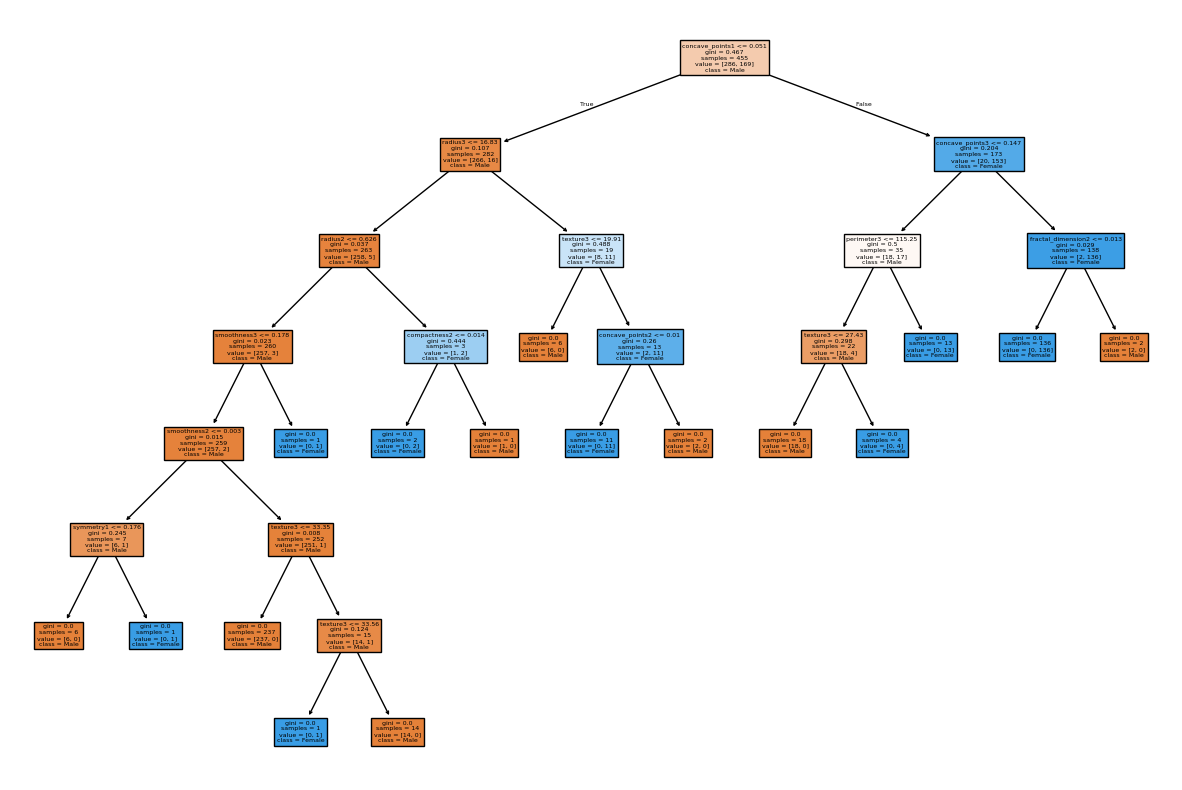

In [ ]:
print_tree(classifier_gini, x, "gini")